# 📊 Predicción de Abandono de Clientes (Churn)
Este proyecto entrena una red neuronal simple para predecir si un cliente abandonará un servicio.

### Objetivos:
- Cargar y preparar un dataset tabular
- Entrenar una red neuronal con Keras
- Visualizar curvas de entrenamiento
- Evaluar el modelo con métricas comunes
- Aplicar buenas prácticas de ingeniería de proyectos

In [9]:
# 📦 1. Importar librerías principales
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
# 📁 2. Cargar y explorar el dataset
df = pd.read_csv('../data/churn_dataset.csv')
df.head()

,compras,llamadas_soporte,dias_inactivo,tiempo_suscrito,churn
0,4,0,27,1,1
1,1,2,25,13,1
2,3,1,18,6,1
3,3,2,23,17,1
4,2,3,18,12,1


In [11]:
# 🔍 3. Separar variables predictoras y variable objetivo
X = df.drop("churn", axis=1)
y = df["churn"]

In [12]:
# 🧼 4. Escalar los datos y dividir en train/test
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
# 🧠 5. Cargar configuración y modelo
import sys, os, yaml
sys.path.append(os.path.abspath("../src"))

from model import build_model
from utils import plot_metrics, show_confusion_matrix

with open("../src/config.yaml") as f:
    config = yaml.safe_load(f)

model = build_model(config)

early_stopping = EarlyStopping(
    monitor=config['training']['early_stopping']['monitor'],
    patience=config['training']['early_stopping']['patience'],
    restore_best_weights=True
)

In [14]:
# 🚂 6. Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=config['training']['epochs'],
    batch_size=config['training']['batch_size'],
    callbacks=[early_stopping]  # ✅ Se aplica aquí
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6098 - loss: 0.6535 - val_accuracy: 0.7312 - val_loss: 0.6054
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7110 - loss: 0.6005 - val_accuracy: 0.7688 - val_loss: 0.5625
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7538 - loss: 0.5634 - val_accuracy: 0.8000 - val_loss: 0.5253
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8131 - loss: 0.5149 - val_accuracy: 0.8062 - val_loss: 0.4910
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8393 - loss: 0.4842 - val_accuracy: 0.8188 - val_loss: 0.4577
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8523 - loss: 0.4398 - val_accuracy: 0.8250 - val_loss: 0.4283
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8573 - loss: 0.4169 - val_accuracy: 0.8375 - val_loss: 0.4033
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8618 - loss: 0.3981 - val_accuracy: 0.8375 - v

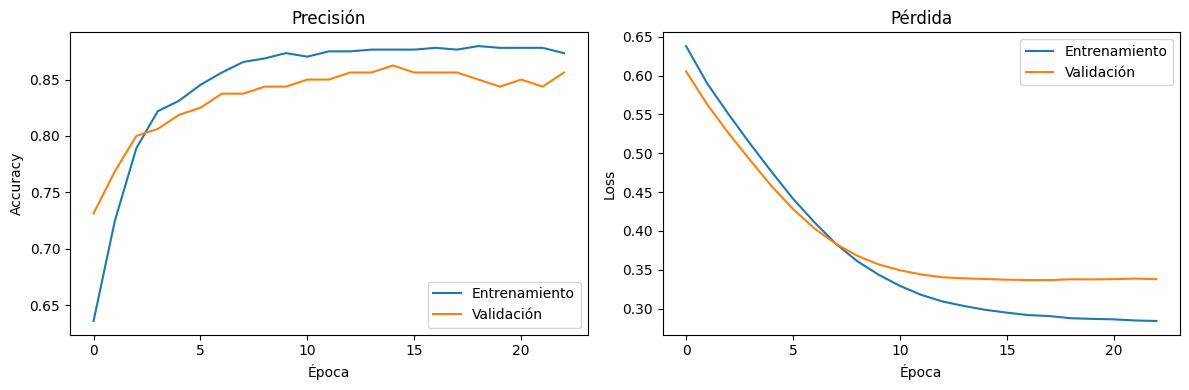

In [15]:
# 📉 7. Visualizar métricas de entrenamiento
plot_metrics(history)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step 


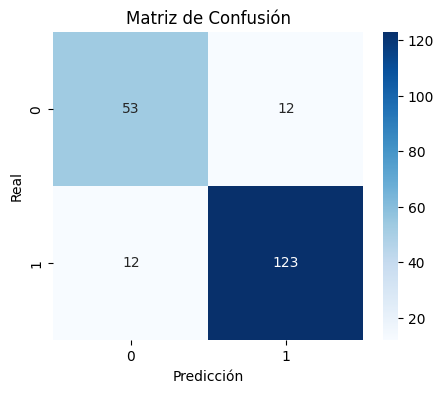

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        65
           1       0.91      0.91      0.91       135

    accuracy                           0.88       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.88      0.88      0.88       200



In [16]:
# 🧪 8. Evaluar el modelo en test
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

show_confusion_matrix(y_test, y_pred_classes)